In [1]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.filters import gaussian,median
from matplotlib import pyplot as plt
from skimage.morphology import disk
from IPython.display import Image

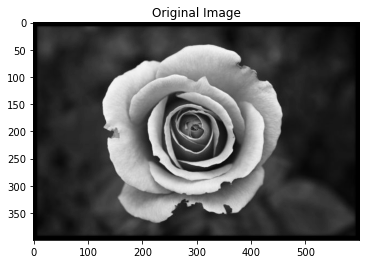

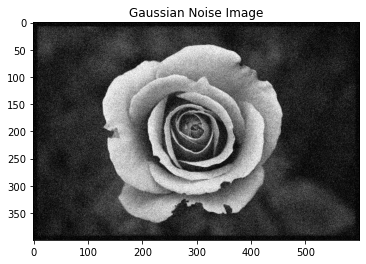

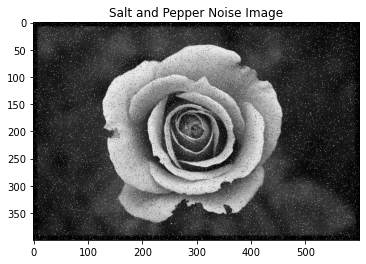

In [5]:
gauss_img = img_as_float(io.imread("GAUSS.JPG", as_gray=True))
saltpepper_img = cv2.imread("S&P.JPG", 0)
original=img_as_float(io.imread("original.JPG", as_gray=True))

plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.show()

img1=gauss_img
img2=saltpepper_img

plt.title("Gaussian Noise Image")
plt.imshow(img1, cmap='gray')
plt.show()
plt.title("Salt and Pepper Noise Image")
plt.imshow(img2, cmap='gray')
plt.show()

### KERNELS FOR GAUSSIAN NOISE REMOVAL

In [6]:
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                           [1/8, 1/4, 1/8],
                           [1/16, 1/8, 1/16]])
conv_using_cv2 = cv2.filter2D(img1, -1, gaussian_kernel, borderType = cv2.BORDER_CONSTANT)
gaussian_using_cv2 = cv2.GaussianBlur(img1, (3,3), -1, borderType = cv2.BORDER_CONSTANT)
gaussian_using_skimage = gaussian(img1, sigma=1, mode='constant', cval=0.0)

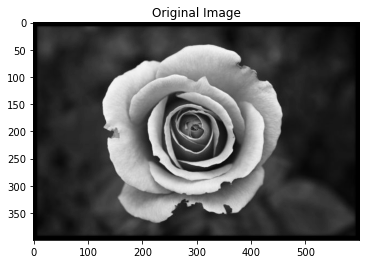

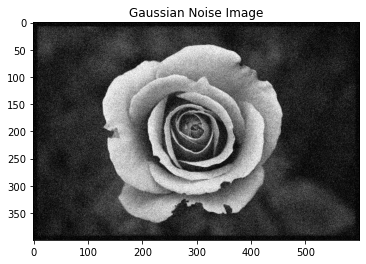

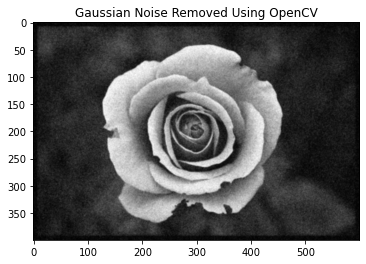

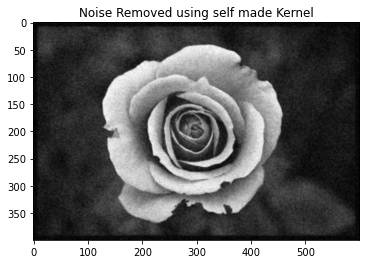

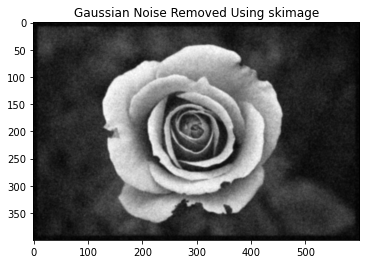

In [7]:
plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.show()

plt.title("Gaussian Noise Image")
plt.imshow(img1, cmap='gray')
plt.show()

plt.title("Gaussian Noise Removed Using OpenCV")
plt.imshow(gaussian_using_cv2, cmap='gray')
plt.show()

plt.title("Noise Removed using self made Kernel")
plt.imshow(gaussian_using_cv2, cmap='gray')
plt.show()

plt.title("Gaussian Noise Removed Using skimage")
plt.imshow(gaussian_using_skimage, cmap='gray')
plt.show()

### KERNELS FOR SALT & PEPPER NOISE REMOVAL

In [8]:
median_using_cv2 = cv2.medianBlur(img2, 3)
median_using_skimage = median(img1, disk(3), mode='constant', cval=0.0)

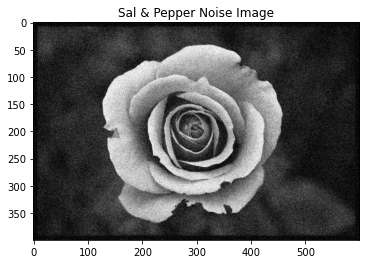

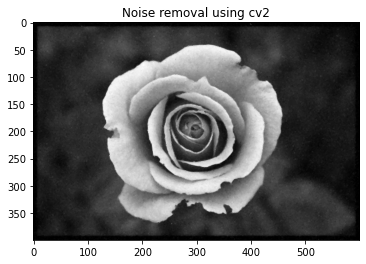

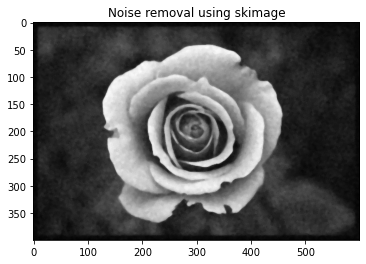

In [9]:
plt.title("Sal & Pepper Noise Image")
plt.imshow(img1, cmap='gray')
plt.show()

plt.title("Noise removal using cv2")
plt.imshow(median_using_cv2, cmap='gray')
plt.show()

plt.title("Noise removal using skimage")
plt.imshow(median_using_skimage, cmap='gray')
plt.show()

### KERNEL FOR SHARPENING AN IMAGE

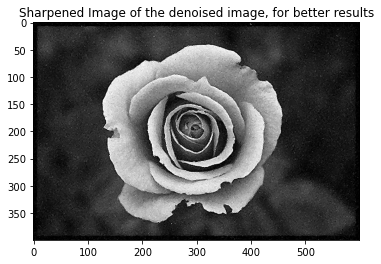

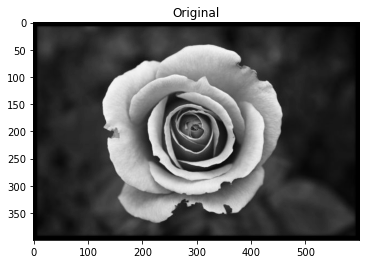

In [10]:
kernel = np.array([[0,-1,0], 
                   [-1,5,-1], 
                   [0,-1,0]])
sharpened_image = cv2.filter2D(median_using_cv2, -1, kernel)  # SHARPENING THE DENOISED IMAGE, TO GET IT CLOSER TO THE ORIGINAL

plt.title("Sharpened Image of the denoised image, for better results")
plt.imshow(sharpened_image, cmap='gray')
plt.show()

plt.title("Original")
plt.imshow(original, cmap='gray')
plt.show()


